# Twitter Sentiment Analysis

Sentiment analysis is using for to identifying as well as classifying the sentiments that are expressed in the text form. Twitter sentiment analysis allows you to keep track of what’s being said or tweets on twitter as an social media. Tweets can often produce a significant amount of sentiment data after analyzed. These data can help us understanding the opinion from people about a variety of topics. This project intends to use various text cleaning techniques to extract information from Tweets. The dataset I am using here for the project of twitter sentiment analysis is downloaded from Kaggle. We can download the dataset [here](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?select=twitter_training.csv).


## Data Collection

Data collection is process of gathering and analyzing data from various sources to find answers to research problems, answer questions, and etc.

In [1]:
#Load data-preprocessing libraries
import pandas as pd
import numpy as np

Lets load the data to read the datasets and get information from it.

In [2]:
#Load training data
training = pd.read_csv('C:/Users/lenovo/Python Projects/twitter/twitter_training.csv',
                          names=["id","company","sentiment","tweet"])
print (training.shape)
training.head()

(74682, 4)


,id,company,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
#Load validation data
validation = pd.read_csv('C:/Users/lenovo/Python Projects/twitter/twitter_validation.csv',
                            names=["id","company","sentiment","tweet"])
print (validation.shape)
validation.head()

(1000, 4)


,id,company,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


So in training dataset, we have 74.682 data. Meanwhile in validation dataset we have 1.000 data. Both of these datasets have 4 columns that include information about the id, company, sentiment, and tweet.

## Data Cleaning

Before we analyze it, we need to clean the data first so the data becomes proper for analysis.

#### 1. Removing null value

In [4]:
training.isnull().sum()

id             0
company        0
sentiment      0
tweet        686
dtype: int64

The training data seems have null values in it. The id, company and sentiment column already clean but the tweet column is not. The tweet column has 686 null values total it means in this column there are 686 data with no text. So we need to remove these null values data.

In [5]:
training=training.dropna()

In [6]:
#Check the result
training.isnull().sum()
training.head(10)

,id,company,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


#### 2. Changing entire row to lower case

After clean the null values data in tweet column, lets change all the sentences in tweet column to lower case.

In [7]:

training['tweet'] = [review.lower() for review in training['tweet']]
training.head(10)

,id,company,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,so i spent a few hours making something for fu...
7,2402,Borderlands,Positive,so i spent a couple of hours doing something f...
8,2402,Borderlands,Positive,so i spent a few hours doing something for fun...
9,2402,Borderlands,Positive,so i spent a few hours making something for fu...


## Removing Punctuation

In the traning dataset that we have, the tweets or text in tweet column seems a little bit messy texts. The texts include many urls, hashtags, typos, abbreviations, emoji, punctuation and deliberatelly misspellings. These symbols seems not contain much useful information, but we do know that many times punctuation can affect the sentiment and meaning of a sentence.
The remove punctuation instructs is a method to eliminate punctuation from a string. This is one of the best ways to strip punctuation from a string.

In [8]:
#Text processing libraries
import nltk
import re
from nltk import FreqDist #function to find the frequent words in the data
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))

#### 1. Remove user mentions from the tweets

 All words that begin with the '@' symbol and are followed by alphanumeric characters will be replaced with whitespaces.

In [9]:
training['tweet']=training['tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+','',x))

In the code above, the regular expression ‘@[A-Za-z0–9]+’ means all the strings starting with '@' symbol followed by a combination of alphabets and numbers.

#### 2. Remove hashtags from the tweets 

Tweets contain ‘#’ to better classify the content. We will replace the hashtags with whitespaces.

In [10]:
training['tweet']=training['tweet'].apply(lambda x: re.sub('#','',x))

#### 3. Remove links/urls from the tweets

Hyperlinks or URLs starting with ‘http’ followed by alphanumeric characters will be removed from the text.
​

In [11]:
training['tweet']=training['tweet'].apply(lambda x: re.sub(r'http\S+','',x))

 #### 4. Another text processing

In this step we did some other text processing tasks like fetching only the letters and ignoring special characters, and removing whitespaces.

In [12]:
def txt_conversion(sentence):
    #Getting only the letters from the tweets
    sentence=re.sub(r'[^a-zA-Z ]','',sentence)
    #split based on space to remove multiple spaces
    words=sentence.split()
    #combining to form sentence
    return (" ".join(words)).strip() 

In [13]:
training['tweet']=training['tweet'].apply(lambda x: txt_conversion(x))

## Removing Stop Words

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “an”, “are” and etc. These are words that generally don’t contribute anything to the meaning of the text. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. 

In [14]:
# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
training['tweet'] = [remove_stopwords(r) for r in training['tweet']]

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights from it. In other words, EDA is the process of summarizing important characteristics of data in order to gain better understanding of the dataset.

#### 1. Let's see the total of each sentiment.

In [15]:
print('Distinct Values: \n')
col=['company','sentiment']
for i in col:
    print(i,'->')
    print(training[i].value_counts())
    print('\n')

Distinct Values: 

company ->
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Bord

From the data above, we have 4 types of sentiment from training dataset namely ‘Positive’, ‘Negative’, ‘Neutral’, and ‘Irrelevant’. The most sentiment is Negative sentiment with 22.358 total sentiments. The least sentiment from the data is Irrelevant sentiment with 12.875 total sentiments.

#### 2. Let's use a pie chart to show the total percentage of each sentiment.

In [16]:
#Load data-visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

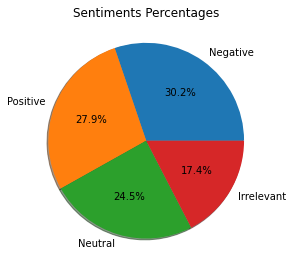

In [17]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(5,3))

#plot pie chart
label = training['sentiment'].value_counts().index
label_count = training['sentiment'].value_counts().values
plt.pie(data=training, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)
plt.title('Sentiments Percentages',pad=42)
plt.show()

So first, we have Negative sentiment with 30.2% total sentiments as the most sentiment. Second we have Positive sentiment with 27.9% total sentiments. Third is Neutral sentiment with 24.5% total sentiments and fourth or the least sentiment is Irrelevant sentiment with 17.4% total sentiments.

#### 3. Showing the top 30 words that appear frequently on positive and negative sentiment with bar chart

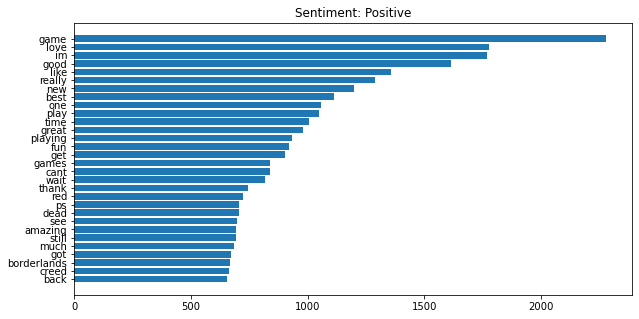

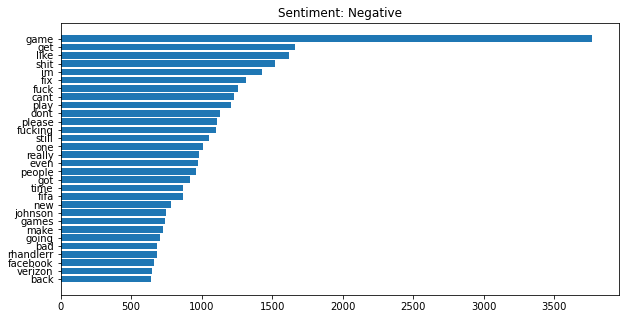

In [18]:
# Positive
# Subset positive review dataset
all_words_pos = training.loc[training['sentiment'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_pos['tweet']])
all_words = all_words.split()
words_train= FreqDist(all_words)

# Extracting words and frequency from words_df object
words_train = pd.DataFrame({'word':list(words_train.keys()), 'count':list(words_train.values())})
words_train

# Subsets top 30 words by frequency
words_train = words_train.nlargest(columns="count", n = 30) 

words_train.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(10,5))
ax = plt.barh(words_train['word'], width = words_train['count'])
plt.title('Sentiment: Positive')
plt.show()

# Negative
# Subset negative review dataset
all_words_neg = training.loc[training['sentiment'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_neg['tweet']])
all_words = all_words.split()
words_train = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_train = pd.DataFrame({'word':list(words_train.keys()), 'count':list(words_train.values())})
words_train

# Subsets top 30 words by frequency
words_train = words_train.nlargest(columns="count", n = 30) 

words_train.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(10,5))
ax = plt.barh(words_train['word'], width = words_train['count'])
plt.title('Sentiment: Negative')
plt.show()

From the bar chart we can see the difference between Positive and Negative sentiment. In Positive sentiment we can see some positive words, like love, good, best, great. In Negative sentiment, instead, we observe lots of swear words. Both Positive and Negative sentiments, the word "game" appears in both sentiments as the top word that appears most often.  In Positive sentiment the "game" word appears with more than 2.000 times while in Negative sentiment the "game" word appears more than 3.500 times. In addition to the word "game", other words appear between the number of times more than 500 to almost 2000 times.

#### 4. Showing the frequent words on positive and negative sentiment using WordCloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites. The more often the word appears in the text that has been analyzed, it will appear and be displayed in a larger size.

(-0.5, 799.5, 499.5, -0.5)

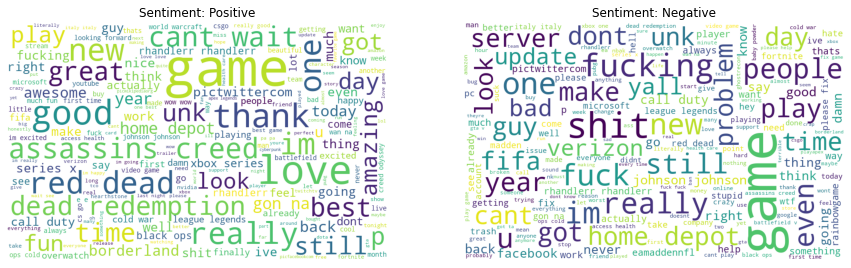

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
all_words=' '.join([text for text in training[training['sentiment']=='Positive']['tweet']])
wordcloud=WordCloud(width=800,height=500,background_color="white",max_font_size=110).generate(all_words)
plt.title('Sentiment: Positive')
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(2,2,2)
all_words=' '.join([text for text in training[training['sentiment']=='Negative']['tweet']])
wordcloud=WordCloud(width=800,height=500,background_color="white",max_font_size=110).generate(all_words)
plt.title('Sentiment: Negative')
plt.imshow(wordcloud)
plt.axis('off')

We can see a clear difference between Positive and Negative sentiment. In "Positive" sentiment we can see some positive words, like love, good, best, great. In "Negative" sentiment, instead, we observe lots of swear words.  In short, the distribution of the most frequently used words differerent for each type of sentiment.